In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer, WordNetLemmatizer
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
import numpy as np
import seaborn as sns
import re
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_excel('Combine.xlsx')
df

,title,text,subject,date,classification
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31 00:00:00,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31 00:00:00,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30 00:00:00,0
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29 00:00:00,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25 00:00:00,0
...,...,...,...,...,...
44914,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22 00:00:00,1
44915,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22 00:00:00,1
44916,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22 00:00:00,1
44917,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22 00:00:00,1


In [2]:
df.describe() #Describes the data

,classification
count,44919.000000
mean,0.476792
std,0.499467
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [3]:
df.head() 

,title,text,subject,date,classification
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31 00:00:00,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31 00:00:00,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30 00:00:00,0
3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29 00:00:00,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25 00:00:00,0


In [4]:
df.tail() 

,title,text,subject,date,classification
44914,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22 00:00:00,1
44915,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22 00:00:00,1
44916,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22 00:00:00,1
44917,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22 00:00:00,1
44918,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,2017-08-22 00:00:00,1


In [5]:
df.dtypes

title             object
text              object
subject           object
date              object
classification     int64
dtype: object

In [6]:
df['classification'].value_counts()

classification
0    23502
1    21417
Name: count, dtype: int64

/tmp/ipykernel_14048/2278129290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='classification', palette='viridis')


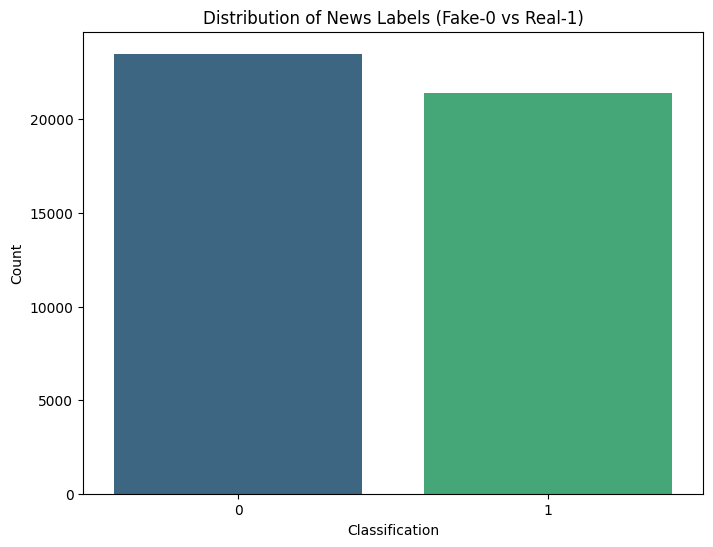

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='classification', palette='viridis')
plt.title('Distribution of News Labels (Fake-0 vs Real-1)')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

In [8]:
df=df.drop(columns=['subject','date','title'])

In [9]:
df.head()


,text,classification
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [10]:
df.tail()

,text,classification
44914,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44915,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44916,MINSK (Reuters) - In the shadow of disused Sov...,1
44917,MOSCOW (Reuters) - Vatican Secretary of State ...,1
44918,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,1


In [11]:
print(f"Shape: {df.shape}")

Shape: (44919, 2)


In [12]:
print(df.isnull().sum())

text              0
classification    0
dtype: int64


<Axes: ylabel='count'>

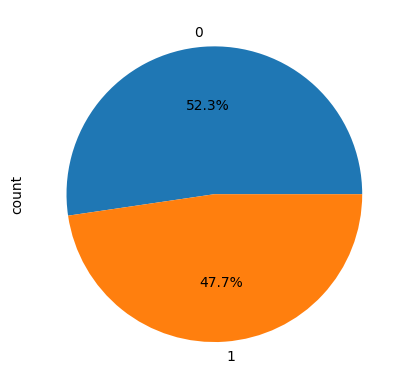

In [13]:
pie=df['classification'].value_counts()
pie.plot(kind='pie', autopct='%1.1f%%')

In [14]:
# Identify and count duplicate entries in the 'article_content' column
duplicate_count=df['text'].duplicated().sum()
print(f"Duplicate entries in the 'text' column: {duplicate_count}")

# Remove duplicates, keeping the first occurrence
df=df.loc[~df['text'].duplicated()]

# Re-index the dataset after dropping duplicates
df.reset_index(inplace=True, drop=True)

Duplicate entries in the 'text' column: 6262


In [15]:
print(f"Updated shape: {df.shape}")

Updated shape: (38657, 2)


In [16]:
df['classification'].value_counts()

classification
1    21191
0    17466
Name: count, dtype: int64

In [17]:
def refine_text(text):
    """
    Refines the text by performing the following operations:
    - Converts to lowercase
    - Removes special characters
    - Eliminates numbers
    - Strips extra spaces
    """
    text=text.lower()# Convert to lowercase
    text=re.sub(r'[^a-zA-Z\s]', ' ',text) # Keep only alphabetic characters and spaces
    text= re.sub(r'\d+', '',text) # Remove digits
    text=re.sub(r'\s+', ' ', text).strip() # Replace multiple spaces with a single space and strip
    return text

# Clean the 'text' column using the refinement function
df.loc[:, 'text'] = df['text'].apply(refine_text)

df[['text']].head()

,text
0,donald trump just couldn t wish all americans ...
1,house intelligence committee chairman devin nu...
2,on friday it was revealed that former milwauke...
3,on christmas day donald trump announced that h...
4,pope francis used his annual christmas day mes...


In [18]:
#nltk.download('punkt')
#nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
def tokenization(text):
    return word_tokenize(text)
# Apply tokenization to the 'text' column
df['tokens']=df['text'].apply(tokenization)
# View the tokenized text data
df[['text','tokens']].head()

,text,tokens
0,donald trump just couldn t wish all americans ...,"[donald, trump, just, couldn, t, wish, all, am..."
1,house intelligence committee chairman devin nu...,"[house, intelligence, committee, chairman, dev..."
2,on friday it was revealed that former milwauke...,"[on, friday, it, was, revealed, that, former, ..."
3,on christmas day donald trump announced that h...,"[on, christmas, day, donald, trump, announced,..."
4,pope francis used his annual christmas day mes...,"[pope, francis, used, his, annual, christmas, ..."


In [19]:
from nltk.corpus import stopwords
#nltk.download('stopwords') # Downloading stopwords
stop_words= set(stopwords.words('english'))

In [20]:
def removestopwords(tokens):
    filtered = [word for word in tokens if word not in stop_words]
    return filtered
# Perform stop words removal on 'tokens' column and store results in a new column
df = df.assign(filter_tokens=df['tokens'].map(removestopwords))
# Display the first few rows of original and filtered tokens for review
df.loc[:, ['tokens','filter_tokens']].head()

,tokens,filter_tokens
0,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y..."
1,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,"[on, friday, it, was, revealed, that, former, ...","[friday, revealed, former, milwaukee, sheriff,..."
3,"[on, christmas, day, donald, trump, announced,...","[christmas, day, donald, trump, announced, wou..."
4,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ..."


In [21]:
from nltk.stem import WordNetLemmatizer

# Download WordNet resources required for lemmatization
#nltk.download('wordnet')
#nltk.download('omw-1.4')

# Instantiate WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to perform lemmatization on tokens
def perform_lemmatization(tokens):
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized

# Add a new column with lemmatized tokens using the defined function
df = df.assign(lemmatized_tokens=df['filter_tokens'].map(perform_lemmatization))

# Display the original and lemmatized tokens for comparison
df.loc[:, ['filter_tokens', 'lemmatized_tokens']].head()

,filter_tokens,lemmatized_tokens
0,"[donald, trump, wish, americans, happy, new, y...","[donald, trump, wish, american, happy, new, ye..."
1,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,"[friday, revealed, former, milwaukee, sheriff,...","[friday, revealed, former, milwaukee, sheriff,..."
3,"[christmas, day, donald, trump, announced, wou...","[christmas, day, donald, trump, announced, wou..."
4,"[pope, francis, used, annual, christmas, day, ...","[pope, francis, used, annual, christmas, day, ..."


In [22]:
df.head()

,text,classification,tokens,filter_tokens,lemmatized_tokens
0,donald trump just couldn t wish all americans ...,0,"[donald, trump, just, couldn, t, wish, all, am...","[donald, trump, wish, americans, happy, new, y...","[donald, trump, wish, american, happy, new, ye..."
1,house intelligence committee chairman devin nu...,0,"[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev...","[house, intelligence, committee, chairman, dev..."
2,on friday it was revealed that former milwauke...,0,"[on, friday, it, was, revealed, that, former, ...","[friday, revealed, former, milwaukee, sheriff,...","[friday, revealed, former, milwaukee, sheriff,..."
3,on christmas day donald trump announced that h...,0,"[on, christmas, day, donald, trump, announced,...","[christmas, day, donald, trump, announced, wou...","[christmas, day, donald, trump, announced, wou..."
4,pope francis used his annual christmas day mes...,0,"[pope, francis, used, his, annual, christmas, ...","[pope, francis, used, annual, christmas, day, ...","[pope, francis, used, annual, christmas, day, ..."


In [23]:
df.tail()

,text,classification,tokens,filter_tokens,lemmatized_tokens
38652,brussels reuters nato allies on tuesday welcom...,1,"[brussels, reuters, nato, allies, on, tuesday,...","[brussels, reuters, nato, allies, tuesday, wel...","[brussels, reuters, nato, ally, tuesday, welco..."
38653,london reuters lexisnexis a provider of legal ...,1,"[london, reuters, lexisnexis, a, provider, of,...","[london, reuters, lexisnexis, provider, legal,...","[london, reuters, lexisnexis, provider, legal,..."
38654,minsk reuters in the shadow of disused soviet ...,1,"[minsk, reuters, in, the, shadow, of, disused,...","[minsk, reuters, shadow, disused, soviet, era,...","[minsk, reuters, shadow, disused, soviet, era,..."
38655,moscow reuters vatican secretary of state card...,1,"[moscow, reuters, vatican, secretary, of, stat...","[moscow, reuters, vatican, secretary, state, c...","[moscow, reuters, vatican, secretary, state, c..."
38656,jakarta reuters indonesia will buy sukhoi figh...,1,"[jakarta, reuters, indonesia, will, buy, sukho...","[jakarta, reuters, indonesia, buy, sukhoi, fig...","[jakarta, reuters, indonesia, buy, sukhoi, fig..."


In [24]:
#Tf-Idf for vectorization of lemmatized_tokens
from sklearn.feature_extraction.text import TfidfVectorizer
#Initialize Tfidf vectorizer
vectorizer=TfidfVectorizer(max_features=5000)
# Prepare the input by joining lemmatized tokens into a single string per document
lemmatized_strings=df['lemmatized_tokens'].map(' '.join)
# Fit the vectorizer and transform the text data into TF-IDF feature matrix
tfidf_matrix=vectorizer.fit_transform(lemmatized_strings)
# Display the resulting array representation of the TF-IDF matrix
print(tfidf_matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.10222443 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [25]:
from sklearn.model_selection import train_test_split
X=tfidf_matrix
y=df['classification']
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=42)
#Checking the Shapes of the Training and Testing Sets
print(f"Training X_Shape: {X_train.shape}")
print(f"Testing X_Shape: {X_test.shape}")
print(f"Training y_Shape: {y_train.shape}")
print(f"Testing y_Shape: {y_test.shape}")

Training X_Shape: (30925, 5000)
Testing X_Shape: (7732, 5000)
Training y_Shape: (30925,)
Testing y_Shape: (7732,)


In [26]:
Mlp_initialize = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Define two hidden layers with 128 and 64 neurons
    activation='tanh',            # Use the tanh activation function
    max_iter=500,                 # Set the maximum number of iterations
    solver='adam',                # Use the Adam optimizer
    learning_rate='constant',     # Set a constant learning rate
    random_state=42               # Ensure reproducibility with a fixed random state
)
# Train the MLP classifier using the training dataset
Mlp_initialize.fit(X_train, y_train)

# Evaluate the model on the training dataset and display the accuracy
Training_accuracy = Mlp_initialize.score(X_train, y_train)*100
print(f"Training Accuracy: {Training_accuracy:.2f}")

# Generate predictions on the testing dataset
Predictions=Mlp_initialize.predict(X_test)

# Calculate and display the test accuracy
Test_accuracy=accuracy_score(y_test,Predictions)*100
print(f"Test Accuracy: {Test_accuracy:.2f}")

# Display a detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test,Predictions))

# Generate and display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,Predictions))

Training Accuracy: 100.00
Test Accuracy: 98.47

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3470
           1       0.98      0.99      0.99      4262

    accuracy                           0.98      7732
   macro avg       0.98      0.98      0.98      7732
weighted avg       0.98      0.98      0.98      7732


Confusion Matrix:
[[3405   65]
 [  53 4209]]


In [27]:
Mlp_initialize = MLPClassifier(
    hidden_layer_sizes=(200), # Define one hidden layer with 150 neurons
    activation='relu',            # Use the relu activation function
    max_iter=800,                 # Set the maximum number of iterations
    solver='adam',                # Use the Adam optimizer
    learning_rate='adaptive',     # Set adaptive learning rate
    random_state=42,              # Ensure reproducibility with a fixed random state
    alpha=0.001
)
# Train the MLP classifier using the training dataset
Mlp_initialize.fit(X_train, y_train)

# Evaluate the model on the training dataset and display the accuracy
Training_accuracy = Mlp_initialize.score(X_train, y_train)*100
print(f"Training Accuracy: {Training_accuracy:.2f}")

# Generate predictions on the testing dataset
Predictions=Mlp_initialize.predict(X_test)

# Calculate and display the test accuracy
Test_accuracy=accuracy_score(y_test,Predictions)*100
print(f"Test Accuracy: {Test_accuracy:.2f}")

# Display a detailed classification report including precision, recall, and F1-score
print("\nDetailed Classification Report:")
print(classification_report(y_test,Predictions))

# Generate and display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,Predictions))


Training Accuracy: 100.00
Test Accuracy: 98.95

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3470
           1       0.99      0.99      0.99      4262

    accuracy                           0.99      7732
   macro avg       0.99      0.99      0.99      7732
weighted avg       0.99      0.99      0.99      7732


Confusion Matrix:
[[3431   39]
 [  42 4220]]


In [28]:
import joblib
# Save the entire MLP model using joblib
joblib.dump(Mlp_initialize, 'Mlp_model.pkl')
print("MLP model saved using joblib")

MLP model saved using joblib


In [31]:
def preprocess_text(text):
    # Tokenize the text
    tokens = text.split()

    # Remove stopwords, lemmatize, and keep only alphabetic words
    cleaned_tokens = [
        lemmatizer.lemmatize(token.lower())  # Lemmatize and convert to lowercase
        for token in tokens if token.lower() not in stop_words and token.isalpha()
    ]

    # Return the preprocessed tokens as a single string
    return ' '.join(cleaned_tokens)


# Train and save the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
x_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_tokens'].apply(lambda x: ' '.join(x)))

joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# Load the trained MLP model
mlp_model = joblib.load('Mlp_model.pkl')

# Collect and process one sentence at a time
while True:
    user_input = input("Enter a sentence to test (or type 'exit' to quit): ").strip()

    if user_input.lower() == 'exit':
        print("Exiting the program.")
        break

    if not user_input:
        print("Invalid input. Please enter a valid sentence.")
        continue

    processed_sentence = preprocess_text(user_input)
    x_example_tfidf = tfidf_vectorizer.transform([processed_sentence])
    prediction = mlp_model.predict(x_example_tfidf)[0]
    prediction_label = "Real" if prediction == 1 else "Fake"

    print(f"Sentence: {user_input} => Prediction: {prediction_label}")

Sentence: JioHotStar merger: Here’s what happens to JioCinema, Disney+ Hotstar websites and apps => Prediction: Real
Sentence: Party first or alliance? Congress's Delhi offensive against Kejriwal's AAP has a message for INDIA bloc => Prediction: Real
Sentence: Ranveer Allahbadia moves SC to quash multiple FIRs in India's Got Latent row; top court denies urgent hearing => Prediction: Fake
Sentence: exot => Prediction: Fake
Exiting the program.
